In [1]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

In [2]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook 

In [3]:
from core.subgraph_specializer import Graph
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import networkx as nx
import scipy.linalg as la

In [6]:
def cha1(x):
    return 2*x % 1

def cha2(x):
    x = x%1
    return -4*x*(x-1)

def lin1(x):
    return .1*x

def lin2(x):
    return (1-.4)*x + 2

def lin4(x):
    return (1-.1)*x + 1.75

def lin5(x):
    return (1-.1)*x + 1.25

def lin6(x):
    return (1-.2)*x + .25

def sig1(x):
    return anp.tanh(x)

def sig2(x):
    return -2*anp.tanh(x)

def sig3(x):
    return 1 / (1 + anp.exp(-x))

def iden(x):
    return x

def zero(x):
    return 0*x

def fun1(x):
    return 1/8 * x**2

def per1(x):
    return anp.sin(x)

def per2(x):
    return 5*anp.cos(10*x)

def fun2(x):
    return anp.log(anp.abs(x)+1)

def fun3(x):
    return anp.exp(-anp.abs(x))

def fun4(x):
    return anp.exp(x)

In [7]:
def print_matrix(A):
    out = '{'
    for line in A:
        out += '\n{'
        for item in line:
            out += str(item)
            out += ','
        out = out[:-1]
        out += '},'
    out = out[:-1]
    print(out + '\n}')

6.282149140749605


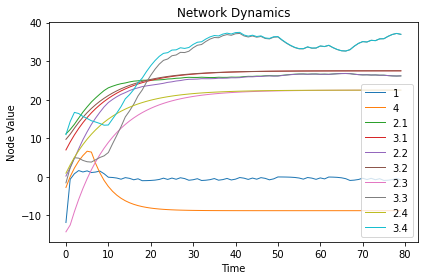

In [8]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [cha1,zero,zero,sig1],
    [sig3,lin5,sig1,zero],
    [sig2,sig3,lin4,zero],
    [zero,sig2,sig3,lin6]
])

labels = ['1','2','3','4']

G = Graph(A,labels=labels,F=f)
base = [0,3]
G = G.specialize(base)
print(G.spectral_radius())
k = G.iterate(80,40*(np.random.random(G.n)-.5),graph=True,title='ex:cha-sync2.pdf', save=True)

1.3999999874995002
2.8358419488387696


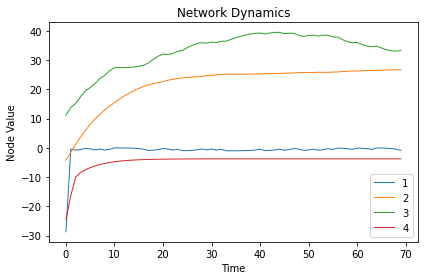

In [25]:
G = Graph(A,labels=labels,F=f)
# print(G.stability_matrix()[1:3,:][:,1:3])
print(np.max(np.abs(la.eig(G.stability_matrix()[1:3,:][:,1:3])[0])))
print(G.spectral_radius())
k = G.iterate(70,60*(np.random.random(G.n)-.5),graph=True,title='ex:cha-sync1.pdf',save=True)

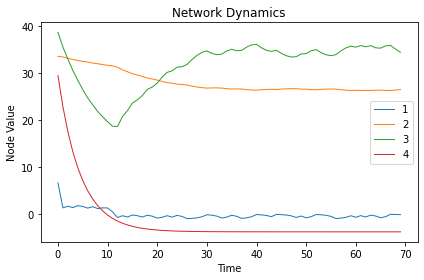

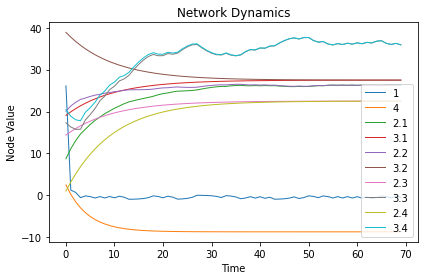

In [10]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [cha1,zero,zero,sig1],
    [sig3,lin5,sig1,zero],
    [sig2,sig3,lin4,zero],
    [zero,sig2,sig3,lin6]
])

labels = ['1','2','3','4']

G = Graph(A,labels=labels,F=f)

k = G.iterate(70,40*np.random.random(G.n),graph=True,title='ex:chaos-sync1.pdf',save=True)

base = [0,3]
G = G.specialize(base)
k = G.iterate(70,40*np.random.random(G.n),graph=True,title='ex:chaos-sync2.pdf', save=True)

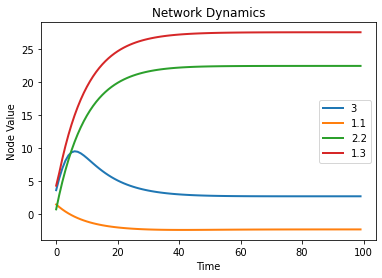

In [8]:
import core.specializer as s

A= np.array(
    [
        [0,1,1],
        [0,0,1],
        [1,0,0]
    ]
)

f = np.array(
    [
        [zero,sig1,sig2],
        [zero,zero,sig1],
        [sig1,zero,zero]
    ]
)

a = np.array([lin4,lin5,lin6])

labels = ['1','2','3']

G = s.DirectedGraph(A, (a, f), labels)
base = ['3']
G.specialize(base)
k = G.iterate(100,5*np.random.random(G.n),graph=True)

In [16]:
B = np.array(
    [
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
    ]
)
G = Graph(B.T,F=None)
base = ['0','1','2','3','6','7','8','9']
G = G.specialize(base)
print_matrix(G.A.toarray().T)

{
{0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0},
{1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0},
{1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0},
{0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0},
{0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0},
{0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1},
{0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0},
{0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0},
{0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0},
{0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0},
{0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0},
{0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0},
{0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0},
{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1},
{0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0}
}


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']